# Video Game Online Sales

- Online store Ice sells video games all over the world. User and expert reviews, genres, platforms, and historical data on game sales are available from open sources for us to study.
- We will perform a preliminary analysis of data to determine any patterns that influence sales. Specifically, we will focus on platforms, genres, and ESRB ratings. 
- The marketing department will use the analysis to help plan advertising campaigns for 2017.
- File(s) accessed: /datasets/games.csv.
- We will [Open the data file(s) and study the general information](#general_overview)
- Summarize observations in [Introductory conclusion section](#general_overview_conclusion).


*   **Project Plan**  

    1. **In the [Data preprocessing](#data_preprocessing) stage**:
        * We will change the column names to uniform lowercase.
        * We will identify missing values and fill in as appropriate.
        * We will check for, investigate, and removed duplicates as appropriate.
        * We will study data types. Change data types where needed.
        * We will summarize observations, actions taken, and rationales in [Data preprocessing conclusion section](#data_preprocessing_conclusion).             
    2. **In the [Calculations](#calculations) stage**:
        * We will calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
        * We will summarize actions taken and rationales in [Calculations conclusion section].(#calculations_conclusion).       
    3. **In the [Exploratory data analysis](#exploratory_data_analysis) stage**:
        * We will look at how many games released per year. 
        * We will investigate sales between platforms.
        * We will select the top 5 platforms with the most sales.
        * We will build a distribution for the top 5 grossing platforms for year and total_sales.
        * We will build a distribution based on data for each year, platforms, and total_sales.
        * We will investigate the platforms of the filtered data for selected years.
        * We will build a box plot for the global sales of all games, broken down by platform.
        * We will compare average sales on various platforms.
        * We will examine how user and professional reviews affect sales for PS4 with scatterplots and correlation.
        * We will compare the sales of the same games on different platforms.
        * We will investigate games by genre.
        * We will investigate genre by total sales.
        * We will consider top 5 platforms and genres in each of the three sales regions (eu, jp, na).
        * We will investigate if ESRB ratings affect sales in individual regions.
        * We will test the hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
        * We will test the hypothesis: Average user ratings for the Action and Sports genres are different.
        * We will summarize observations, actions taken, and rationales in [Exploratory data analysis conclusion section](#exploratory_data_analysis_conclusion).       
    4. **In the [Overall conclusion](#conclusion)**:
        * We will summarize the project's analysis. 
        
        
*   **Table of Contents** <a class="anchor" id="table_of_contents"></a> 

    1. **[Data preprocessing](#data_preprocessing)**
        * 1.1 [Data preprocessing conclusion section](#data_preprocessing_conclusion)
    2. **[Calculations](#calculations)**
        * 2.1 [Calculations conclusion section](#calculations_conclusion)
    3. **[Carry out exploratory data analysis](#exploratory_data_analysis)**
        * 3.1 [Exploratory data analysis conclusion section](#exploratory_data_analysis_conclusion)
    4. **[Overall conclusion](#conclusion)**
 

<a class="anchor" id="general_overview"></a>
**Open the data file and study the general information**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# import sys and insert code to ignore warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
# load the data 
try:
    df = pd.read_csv('/Users/rraven/Desktop/a_final_yandex/datasets/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [4]:
# set table name to a variable for printing ease
tbl_name='the games table'
# print the first 5 rows of the dataframe
print('\nFirst 5 rows of', tbl_name,)
df.head()


First 5 rows of the games table


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


We note the column names are in some form of Camel_Case. This will need to be changed to lowercase.

In [5]:
# df general info
print('\nGeneral info for', tbl_name)
# check df for duplicates 
print('\nNumber of duplicate rows:', df.duplicated().sum())
# check df for shape 
print('\nNumber rows and columns:', df.shape, '\n')
# check df for info
print(df.info())
# check for missing values
print(" \nCount total NaN at each column in a DataFrame :\n")
print(df.isnull().sum())

print('\nUnique values for columns')
df.nunique()


General info for the games table

Number of duplicate rows: 0

Number rows and columns: (16715, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
 
Count total NaN at each column in a DataFrame :

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Scor

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

No duplicate rows are observed. There are 11 columns with 16715 rows, but there are 22318 missing values divided between 6 colums (range of 2 to 8578). There is a large difference between the total number of Name rows and the number of unique entries in the name column which we will explore further.

In [6]:
print('Frequency count of games by name')
df.Name.value_counts().head(10)

Frequency count of games by name


Need for Speed: Most Wanted                12
Madden NFL 07                               9
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
LEGO Star Wars II: The Original Trilogy     8
FIFA Soccer 13                              8
LEGO The Hobbit                             8
Cars                                        8
LEGO Harry Potter: Years 5-7                8
Name: Name, dtype: int64

In [7]:
print('List of rows for games with the name "Need for Speed: Most Wanted"')
df.loc[df['Name'] == "Need for Speed: Most Wanted"]

List of rows for games with the name "Need for Speed: Most Wanted"


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


We note that a game with the same name can be released on different platforms and/or in different years so there are no duplicate rows.

In [8]:
# iterating the columns for counts of items
for col in df.columns:
    print('\nColumn information for:', col)
    print(df[col].value_counts(dropna=False).sort_index())


Column information for: Name
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
uDraw Studio                    1
uDraw Studio: Instant Artist    2
wwe Smackdown vs. Raw 2006      1
¡Shin Chan Flipa en colores!    1
NaN                             2
Name: Name, Length: 11560, dtype: int64

Column information for: Platform
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: Platform, dtype: int64

Column information for: Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983

We observe there are 2424 'tbd' in the user score column and several columns have NaN or NaT missing values. Also, the distribution in the platform, release year, genre, and rating are quite uneven. 

In [9]:
# check general statistics for dataframe
print('Statistics for', tbl_name)
df.describe().T

Statistics for the games table


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


<a class="anchor" id="general_overview_conclusion"></a>

**Introductory Conclusions**

Column | Count | Unique Values | Missing Values | Data Type | Description 
------------ | ------ | ------------- | ----------------- | --------------- | ---------
Name | 16713 | 11559 | 2 | object | name of the game
Platform | 16715 | 31 | 0 |object | e.g. Xbox or PlayStation
Year_of_Release  | 16446 | 37 | 269 | float64 | year of game release
Genre | 16713 | 12 | 2 | object | genre of game
NA_sales | 16715 | 402 | 0 | float64 | North American sales in USD million
EU_sales | 16715 | 307 | 0 | float64 | sales in Europe in USD million
JP_sales | 16715 | 244 | 0 | float64 | sales in Japan in USD million
Other_sales | 16715 | 155 | 0 | float64 | sales in other countries in USD million
Critic_Score | 8137 | 82 | 8578 | float64 | maximum of 100  
User_Score | 10014 | 96 | 6701 | object | maximum of 10
Rating | 9949 | 8 | 6766 | object | ESRB: Entertainment Software Rating Board


- We note the column names are in a form of Camel_Case. They need to be changed to lowercase.
- We note the data type needs to be changed for Year, Critic_Score, User_Score to int
- We note they data of platform, genre, and rating to category for memory conservation
- We observe the games table contains 16715 rows and 11 columns.
- We observe no duplicate rows, but 22318 missing values.
- We observe 6 rows with missing values, ranging from 2 to 8578.
- We note a disparity between mean and median values for all 4 sales categories.
- We observe the year of release ranges from 1980 to 2016.
- We note over half the values are missing a critic score.
- We observe over 2424 tbd values in the user score column.
- We note a discrepency between only 11559 unique values of 16713 total rows, however we explored further and the same game may be released on different platforms or in different years. No duplicated rows are noted.
- We note the distribution in the platform, release year, genre, and rating are quite uneven. 

Now we will move to the preprocessing stage.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: I couldn't agree more!
</div>

**[Return to table of contents](#table_of_contents)**

<a class="anchor" id="data_preprocessing"></a>
**1. Data preprocessing**

- First we will change the column names to all lowercase.
- We will explore the missing values in 6 rows 

- We will investigate the disparities between mean and median for all 4 sales categories
- We will explore the difference between unique values and total rows for the user score


In [10]:
# change column names to lowercase
df.columns = map(str.lower, df.columns)
print('Verify column names are now lowercase')
df.head(1)

Verify column names are now lowercase


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [11]:
print('Now we will examine the missing values and then we can change the data types.')
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame :\n")
print(df.isnull().sum())

Now we will examine the missing values and then we can change the data types.
 
Count total NaN at each column in a DataFrame :

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [12]:
# explore the missing values in name
print('The 2 rows in the name column missing values')
df[df.name.isnull()]

The 2 rows in the name column missing values


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# explore the missing values in name
print('The 2 rows in the genre column missing values')
df[df.genre.isna()]

The 2 rows in the genre column missing values


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


These 2 rows are for games released in 1993. These may be old records when maybe they were only tracking platform, year, and sales. Maybe the data has been corrupted when copied from another database. We will delete the 2 records showing up in the name and genre columns (they are the same records) since they will not help in our analysis.  Then we will explore year_of_release. 

In [14]:
# drop 2 rows with missing values in the name column
df = df[df.name.notna()]
# explore the missing values in name
print('The rows in the year_of_release column missing values')
df[df.year_of_release.isna()]

The rows in the year_of_release column missing values


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Omission, error, or oversight are likely reasons why the year wasn't filled in for these, relatively, few columns. The rows with missing values in year_of_release do have useful data that may help our analysis. There is not enough information to fill in the year for the 269 rows (unless we spent hours researching). We will leave the NaT values. Next we will explore the missing values in user_score.

In [15]:
# explore the missing values in user_score
print('The rows in the user_score column missing values')
df[df.user_score.isna()]

The rows in the user_score column missing values


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
# explore the missing values in user_score
print('The rows in the user_score column with tbd')
df.query('user_score == "tbd"')

The rows in the user_score column with tbd


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


There are many missing values and also many rows with tbd. It is likely that these games weren't scored by the user or the score wasn't recorded. We can consider tbd as if it is a missing value because we are examining the data captured at a point in time. At the instant this data was captured, that value was missing.

We will change the tbd values in the table (since the only place they are found is in the user_score column) with NaN. Then we need to change the data type of user_score to float from object. Then we will check for correlations with the other numerical columns in the table.

In [17]:
# replace tbd values with NaN
df.replace('tbd', np.nan, inplace=True) 

# change user_score to float
df.user_score = df.user_score.apply(np.float)
df.user_score = df.user_score.astype('float32')

# verify new data types
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float32
rating              object
dtype: object

In [18]:
# investigate if there are any correlations with numerical columns

print('Exploration of relationships between user_score and numeric columns')
df[['user_score', 'critic_score','year_of_release', 'na_sales',\
                                    'eu_sales', 'jp_sales', 'other_sales']].corr()

Exploration of relationships between user_score and numeric columns


,user_score,critic_score,year_of_release,na_sales,eu_sales,jp_sales,other_sales
user_score,1.000000,0.580878,-0.267851,0.086200,0.055337,0.125598,0.057119
critic_score,0.580878,1.000000,0.011411,0.240755,0.220752,0.152593,0.198554
year_of_release,-0.267851,0.011411,1.000000,-0.092326,0.004045,-0.168477,0.037821
na_sales,0.086200,0.240755,-0.092326,1.000000,0.765341,0.449668,0.638695
eu_sales,0.055337,0.220752,0.004045,0.765341,1.000000,0.435079,0.722796
jp_sales,0.125598,0.152593,-0.168477,0.449668,0.435079,1.000000,0.291090
other_sales,0.057119,0.198554,0.037821,0.638695,0.722796,0.291090,1.000000


We discovered a moderate to strong relationship between user_score and critic score. This passes the common sense test as well, since we expect user and professional reviews to be in a similar range. No other useful correlations are noted in this table. Other possible columns to consider are name, platform, genre, and rating. Rating will not be useful because there are too many missing values. We will create numerical categories for platform and genre and check for any relationships.

In [19]:
# process genre into numerical groups

# create a new function, genre_fx 
def genre_fx(row):

    grp = row['genre']
    
    if grp == 'Action':
        return 1
    elif grp == 'Sports':
        return 2
    elif grp == 'Misc':
        return 3  
    elif grp == 'Role-Playing':
        return 4
    elif grp == 'Shooter':
        return 5
    elif grp == 'Adventure':
        return 6
    elif grp == 'Racing':
        return 7
    elif grp == 'Platform':
        return 8
    elif grp == 'Simulation':
        return 9
    elif grp == 'Fighting':
        return 10
    elif grp == 'Strategy':
        return 11
    elif grp == 'Puzzle':
        return 12
    
# create a new column
df['genre_cat'] = df.apply(genre_fx, axis=1)

print('Exploration of relationships between user_score and genre')
df[['user_score','genre_cat']].corr()

Exploration of relationships between user_score and genre


,user_score,genre_cat
user_score,1.000000,0.048904
genre_cat,0.048904,1.000000


No relationship noted between user_score and genre_cat so we will divide the platforms into 5 main groups and check for relationships.

In [20]:
# process platform into numerical groups

# create a new function, plat_fx 
def plat_fx(row):

    grp = row['platform']
    
    if grp.startswith('P'):
        return 1
    elif grp.startswith('N'):
        return 2
    elif grp.startswith('W'):
        return 3
    elif grp.startswith('X'):
        return 4
    else:
        return 5
    
# create a new column
df['plat_cat'] = df.apply(plat_fx, axis=1)

print('Exploration of relationships between user_score and platform')
df[['user_score','plat_cat']].corr()

Exploration of relationships between user_score and platform


,user_score,plat_cat
user_score,1.00000,-0.02631
plat_cat,-0.02631,1.00000


In [21]:
# stats for user_score
df[['user_score']].describe()

,user_score
count,7590.000000
mean,7.125046
std,1.500006
min,0.000000
25%,6.400000
50%,7.500000
75%,8.200000
max,9.700000


Once again, we see no relationship. We will fill in user_score with the influence of critic_score. We will use the median since there is a downward skew on the mean.

In [22]:
# fill in missing values of user_score using influence of critic_score
print('Missing values in user_score before:', df['user_score'].isnull().sum())
print('Fill in missing values of user score using the influence of critic_score ')
df['user_score'] = df['user_score'].fillna(df.groupby(['critic_score'])['user_score'].transform('median'))

# print the number of missing values in data after filling nan
# print the number of missing values in data after filling nan
print('\nThe number of missing values remaining in user_score')
df['user_score'].isnull().sum()

Missing values in user_score before: 9123
Fill in missing values of user score using the influence of critic_score 

The number of missing values remaining in user_score


8003

In [23]:
# stats for missing values
print('user_score missing values statistics')
df.query('user_score.isnull()').describe()

user_score missing values statistics


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,genre_cat,plat_cat
count,7892.000000,8003.000000,8003.000000,8003.000000,8003.000000,0.0,0.0,8003.000000,8003.000000
mean,2005.506336,0.175882,0.082194,0.105311,0.021409,NaN,NaN,5.014869,2.844183
std,7.102386,0.735725,0.323666,0.354952,0.085738,NaN,NaN,3.357579,1.816594
min,1980.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,1.000000
25%,2000.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2.000000,1.000000
50%,2008.000000,0.010000,0.000000,0.010000,0.000000,NaN,NaN,4.000000,3.000000
75%,2010.000000,0.130000,0.040000,0.070000,0.010000,NaN,NaN,7.000000,5.000000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,NaN,NaN,12.000000,5.000000


We still have many missing values even after filling using the influence of critic_score. It is likely that these games were never scored by the critic or the score wasn't recorded. It appears most of the games in this group are older, over 75% are from 2010 or before. Our best choice is to fill these values with the median value.

In [24]:
# stats for missing values
print('user_score missing values statistics where year_of_release > 2013')
df.query('year_of_release > 2013 & user_score.isnull()').describe()

user_score missing values statistics where year_of_release > 2013


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,genre_cat,plat_cat
count,787.000000,787.000000,787.000000,787.000000,787.000000,0.0,0.0,787.000000,787.000000
mean,2014.984752,0.084638,0.076912,0.074244,0.023875,NaN,NaN,3.646760,2.193139
std,0.782942,0.411100,0.344432,0.270959,0.121318,NaN,NaN,2.909535,1.689152
min,2014.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,1.000000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,1.000000
50%,2015.000000,0.000000,0.000000,0.020000,0.000000,NaN,NaN,3.000000,1.000000
75%,2016.000000,0.030000,0.030000,0.060000,0.010000,NaN,NaN,6.000000,4.000000
max,2016.000000,6.030000,5.860000,3.180000,2.380000,NaN,NaN,12.000000,5.000000


We observe a comparatively small number of missing values in the 2014-2016 time range. Filling the remainder of the missing values in user_score with the median of user_score should not negatively impact our overall analysis. 

In [25]:
# replace missing values in user_score with median
print('The number of missing values in user_score:',df['user_score'].isnull().sum() )
median_us = df.user_score.median()

df.user_score.fillna(value=median_us, inplace = True)
print('The number of missing values remaining in user_score:',df['user_score'].isnull().sum() )
# stats for user_score
df[['user_score']].describe()

The number of missing values in user_score: 8003
The number of missing values remaining in user_score: 0


,user_score
count,16713.00000
mean,7.23716
std,1.04769
min,0.00000
25%,7.30000
50%,7.40000
75%,7.40000
max,9.70000


The statistics are close to before, the mean and median converging slightly. No missing values remain so we will now examine critic_score.

In [26]:
# explore the missing values in critic_score 
print('The rows in the critic_score column missing values')
df[df.critic_score.isna()]

The rows in the critic_score column missing values


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,genre_cat,plat_cat
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,7.4,NaN,8,2
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.4,NaN,4,5
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,7.4,NaN,12,5
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,7.4,NaN,5,2
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,7.4,NaN,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,7.4,NaN,1,1
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,7.4,NaN,2,4
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,7.4,NaN,6,1
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,7.4,NaN,8,5


Already we note an interesting connection: These are older games and many of the missing values in critic_score were also missing in user_score. We will check for correlations between critic_score and other columns.

In [27]:
# investigate if there are any correlations with numerical columns

print('Exploration of relationships between critic_score and numeric columns')
df[['critic_score','user_score', 'year_of_release', 'na_sales',\
                                    'eu_sales', 'jp_sales', 'other_sales', 'plat_cat', 'genre_cat']].corr()

Exploration of relationships between critic_score and numeric columns


,critic_score,user_score,year_of_release,na_sales,eu_sales,jp_sales,other_sales,plat_cat,genre_cat
critic_score,1.000000,0.606240,0.011411,0.240755,0.220752,0.152593,0.198554,-0.106884,0.015798
user_score,0.606240,1.000000,-0.150431,0.054992,0.036710,0.088154,0.038274,-0.019487,0.040496
year_of_release,0.011411,-0.150431,1.000000,-0.092326,0.004045,-0.168477,0.037821,-0.068217,-0.130280
na_sales,0.240755,0.054992,-0.092326,1.000000,0.765341,0.449668,0.638695,0.022178,-0.013399
eu_sales,0.220752,0.036710,0.004045,0.765341,1.000000,0.435079,0.722796,-0.048220,-0.023147
jp_sales,0.152593,0.088154,-0.168477,0.449668,0.435079,1.000000,0.291090,0.046030,0.033215
other_sales,0.198554,0.038274,0.037821,0.638695,0.722796,0.291090,1.000000,-0.090014,-0.040632
plat_cat,-0.106884,-0.019487,-0.068217,0.022178,-0.048220,0.046030,-0.090014,1.000000,0.032138
genre_cat,0.015798,0.040496,-0.130280,-0.013399,-0.023147,0.033215,-0.040632,0.032138,1.000000


No correlations noted except for user_score and critic_score. We will fill in values using the influence of user_score. 

In [28]:
# fill in missing values of critic_score using influence of user_score

print('Missing values in critic_score before:', df['critic_score'].isnull().sum())
print('Fill in missing values of critic score using the influence of user_score ')
df['critic_score'] = df['critic_score'].fillna(df.groupby(['user_score'])['critic_score'].transform('median'))

# print the number of missing values in data after filling nan
print('\nThe number of missing values remaining in critic_score')
df['critic_score'].isnull().sum()

Missing values in critic_score before: 8576
Fill in missing values of critic score using the influence of user_score 

The number of missing values remaining in critic_score


11

We will fill in the final missing values with the median of critic_score and then examine the rating column.

In [29]:
# fill in missing values with mean
median_cs = df.critic_score.median()
df.critic_score.fillna(value=median_cs, inplace = True)
print('The number of missing values remaining in critic_score', df['critic_score'].isnull().sum())

# stats for user_score
df[['critic_score']].describe()

The number of missing values remaining in critic_score 0


,critic_score
count,16713.000000
mean,69.353796
std,9.986042
min,13.000000
25%,70.000000
50%,70.000000
75%,71.000000
max,98.000000


In [30]:
# explore missing values in rating column
print('The rows in the rating column missing values')
df[df.rating.isna()].head()

The rows in the rating column missing values


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,genre_cat,plat_cat
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,70.0,7.4,NaN,8,2
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,70.0,7.4,NaN,4,5
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,70.0,7.4,NaN,12,5
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,70.0,7.4,NaN,5,2
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,70.0,7.4,NaN,9,5


In [31]:
# explore the statistics for the missing rows in rating
print('Statistics for the rows in the rating column missing values')
df[df.rating.isna()].describe().T

Statistics for the rows in the rating column missing values


,count,mean,std,min,25%,50%,75%,max
year_of_release,6676.0,2004.883463,7.491332,1980.0,1999.0,2007.00,2011.00,2016.00
na_sales,6764.0,0.183424,0.796083,0.0,0.0,0.00,0.12,29.08
eu_sales,6764.0,0.090671,0.348012,0.0,0.0,0.00,0.05,10.95
jp_sales,6764.0,0.124472,0.383076,0.0,0.0,0.02,0.10,10.22
other_sales,6764.0,0.022324,0.092140,0.0,0.0,0.00,0.01,2.74
critic_score,6764.0,69.972354,1.521633,31.0,70.0,70.00,70.00,93.00
user_score,6764.0,7.394132,0.169992,3.1,7.4,7.40,7.40,9.20
genre_cat,6764.0,4.981520,3.331786,1.0,2.0,4.00,7.00,12.00
plat_cat,6764.0,2.678740,1.824833,1.0,1.0,2.00,5.00,5.00


It is likely that this information wasn't even collected for the missing rows, especially since some of these games probably didn't even have ratings. The rows missing values in the rating column tend to be older, average in the mid 2000s, and even though the ESRB was founded in 1994, it was voluntary. 

Since there is not a way to estimate these ratings without exhaustive research, we will keep the missing values for the rating column. After verifying the total counts of missing values, we will change datatypes and verify those changes.

In [32]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame :\n")
print(df.isnull().sum())

 
Count total NaN at each column in a DataFrame :

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
genre_cat             0
plat_cat              0
dtype: int64


In [33]:
# change/downcast datatypes as appropriate
# For columns with low cardinality (the amount of unique values is lower than 50% of the count of these values)
# changing from object to category will help optimize memory and retrieval

# no change to name as it doesn't have low cardinality

# change platform, genre, and rating to category
df.platform = df.platform.astype('category')
df.genre = df.genre.astype('category')
df.rating = df.rating.astype('category')

# change year_of_release to datetime year
df.year_of_release = pd.to_datetime(df.year_of_release, format='%Y')
df.year_of_release = df.year_of_release.dt.year

# downcast float values for the sales columns
df.na_sales = pd.to_numeric(df.na_sales, downcast='float')
df.eu_sales = pd.to_numeric(df.eu_sales, downcast='float')
df.jp_sales = pd.to_numeric(df.jp_sales, downcast='float')
df.other_sales = pd.to_numeric(df.other_sales, downcast='float')

# change critic_score from float to int
df.critic_score = df.critic_score.apply(np.int)
df.critic_score = df.critic_score.astype('int16')

# verify new data types
df.dtypes

name                 object
platform           category
year_of_release     float64
genre              category
na_sales            float32
eu_sales            float32
jp_sales            float32
other_sales         float32
critic_score          int16
user_score          float32
rating             category
genre_cat             int64
plat_cat              int64
dtype: object

In [34]:
# explore the missing values in name
print('The rows in the critic_score column missing values')
df[df.critic_score.isna()]

The rows in the critic_score column missing values


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,genre_cat,plat_cat


<a class="anchor" id="data_preprocessing_conclusion"></a>
**1.1 Data preprocessing conclusion**

- We changed the column names to lowercase
- We observed many missing values representing values that may never have been recorded, collected, or created (in the case of reviews and ratings). Many of the missing values were noted in games released prior to 2011, so those records might have been lost or simply never collected.
- We deleted the 2 NaN records in name/genre (they are the same records) since they:
    - they will not help our analysis
    - are in rows where only the platform, year_of_release, and sales data is available
- We left the 269 rows with NaT values in the year_of_release column because:
    - those rows may have valuable information and potentially could help our analysis
    - there is no time reasonable way to replace the NaT with correct year values
- We filled in the missing rows of the user_score column with the influence of critic_score first and then median because:
    - we observed a moderate to strong correlation between critic_score and user_score
    - we observed the mean skewed downward slightly, so we used the median to replace values
- We filled in the missing rows of the critic_score column with the influence of user_score first and then median because:
    - we observed a moderate to strong correlation between critic_score and user_score
    - we observed the mean skewed downward slightly, so we used the median to replace values
- We left the 6764 rows with NaT values in the rating column because:
    - those rows may have valuable information and potentially could help our analysis
    - there is no time reasonable way to replace the NaT with correct year values
- We changed the data types because:
    - year_of_relase should be in datetime, user_score should be float
    - reduce overall memory usage   

**[Return to table of contents](#table_of_contents)**

<a class="anchor" id="calculations"></a>
**2. Calculations**

- We will calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [35]:
# calculate the total sales

def total_sales_fx(row):

    eu = row['eu_sales']
    jp = row['jp_sales']
    na = row['na_sales']    
    o = row['other_sales'] 
    
    total =  eu+jp+na+o #df.eu + df.jp + df.na + df.o
    return total
    
# create a new column
df['total_sales'] = df.apply(total_sales_fx, axis=1)
df.total_sales = pd.to_numeric(df.total_sales, downcast='float')
# verify new column added
df[['total_sales']].head

<bound method NDFrame.head of        total_sales
0        82.540001
1        40.239998
2        35.520000
3        32.770000
4        31.380001
...            ...
16710     0.010000
16711     0.010000
16712     0.010000
16713     0.010000
16714     0.010000

[16713 rows x 1 columns]>

<a class="anchor" id="calculations_conclusion"></a>
**2.1 Calculations conclusion**

- We calculated the total sales (the sum of sales in all regions) for each game and put this value in the total_sales column 

**[Return to table of contents](#table_of_contents)**

<a class="anchor" id="exploratory_data_analysis"></a>
**3. Exploratory data analysis**

- We will look at how many games released per year. 
- We will investigate sales between platforms.
- We will select the top 5 platforms with the most sales.
- We will build a distribution for the top 5 grossing platforms for year and total_sales.
- We will build a distribution based on data for each year, platforms, and total_sales.
- We will investigate the platforms of the filtered data for selected years.
- We will build a box plot for the global sales of all games, broken down by platform.
- We will compare average sales on various platforms.
- We will examine how user and professional reviews affect sales for PS4 with scatterplots and correlation.
- We will compare the sales of the same games on different platforms.
- We will investigate games by genre.
- We will investigate genre by total sales.
- We will consider top 5 platforms and genres in each of the three sales regions (eu, jp, na).
- We will investigate if ESRB ratings affect sales in individual regions.
- We will test the hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
- We will test the hypothesis: Average user ratings for the Action and Sports genres are different.

Number of games released by year varies from 9 to 1427


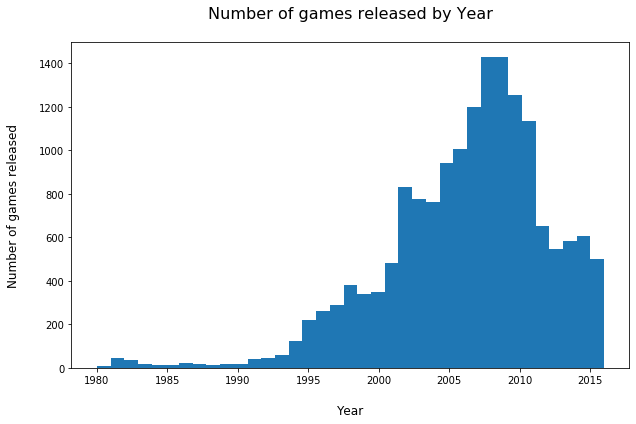

In [36]:
# examine how many games relased per year
ct = len(df.year_of_release.value_counts())
min_yr = min(df.year_of_release.value_counts())
max_yr = max(df.year_of_release.value_counts())

print('Number of games released by year varies from', min_yr,\
     'to', max_yr)
df.year_of_release.plot(kind='hist', bins=ct, figsize=(10,6))
plt.title('Number of games released by Year\n', fontsize=16)
plt.ylabel('Number of games released\n', fontsize=12)
plt.xlabel('\nYear', fontsize=12)
plt.show()

There is a wide variation for the number of games released each year. Recent values are more significant as they show current trends in this volatile market, even if the number of games released is less. Game platform popularity can change quickly. Anything before 2006 may simply be too old to have any useful information for our forecast analysis. However, there is an argument that volumn of games, and therefore the ability to sift through many to find the characteristics of the best performers, may also have merit. The peak release years are around 2008 to 2011. Another factor to consider is the mobile platforms, which are not included in this data. Now we will examine the relationship between total sales and platforms.

In [37]:
# investigate sales between platforms
print('Total sales by platforms')
total_sales_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
total_sales_platforms.sort_values('total_sales', ascending=False)

Total sales by platforms


,total_sales
platform,
PS2,1255.770020
X360,971.419983
PS3,939.650024
Wii,907.510010
DS,806.119995
PS,730.859985
GBA,317.850006
PS4,314.139984
PSP,294.049988


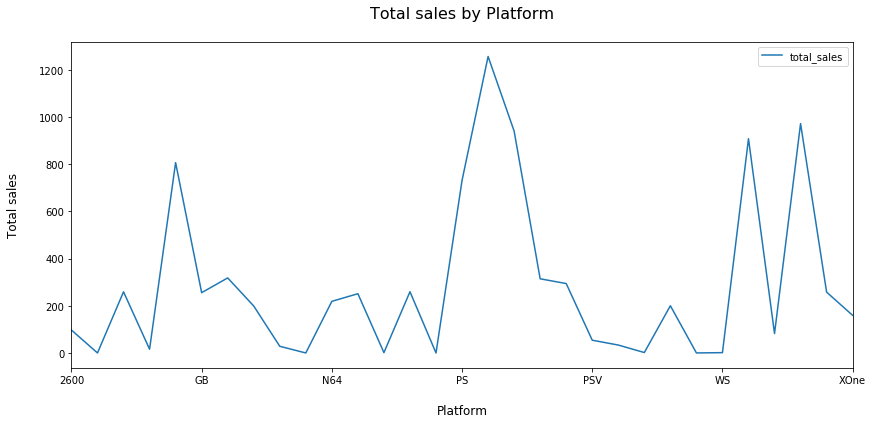

In [38]:
# plot information platform and sales
total_sales_platforms.plot(figsize=(14,6))
plt.title('Total sales by Platform\n', fontsize=16)
plt.ylabel('Total sales\n', fontsize=12)
plt.xlabel('\nPlatform', fontsize=12)
plt.show()

In [39]:
# select the 5 platforms with the most total_sales
print('Top 5 platforms with the most total sales')
total_sales_platforms.sort_values('total_sales', ascending=False).head()

Top 5 platforms with the most total sales


,total_sales
platform,
PS2,1255.770020
X360,971.419983
PS3,939.650024
Wii,907.510010
DS,806.119995


We observe a great variation in total_sales depending on the platform. Now we will create a list of the 5 platforms with the most total sales. Then we will build a distribution based on data for each year and those 5 platforms.

In [40]:
# create a list of the 5 platforms with the greatest total sales
top_5_p = ["PS2", "X360", "PS3", "Wii", "DS"]
top_5_p

['PS2', 'X360', 'PS3', 'Wii', 'DS']

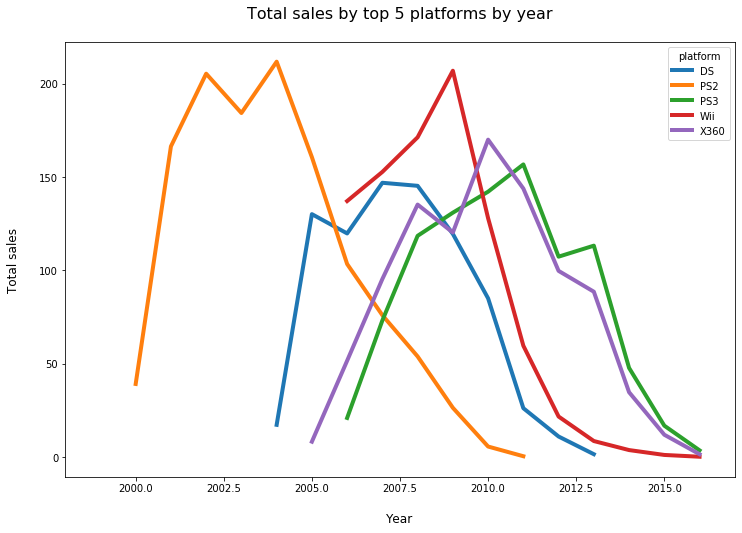

In [41]:
# build a distribution based on data for each year and those 5 platforms

df[df['platform'].isin(top_5_p)].pivot_table(index='year_of_release', \
         columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(12,8), linewidth=4)

plt.title('Total sales by top 5 platforms by year\n', fontsize=16)
plt.ylabel('Total sales\n', fontsize=12)
plt.xlim(1998, 2017)
plt.xlabel('\nYear', fontsize=12)
plt.show()

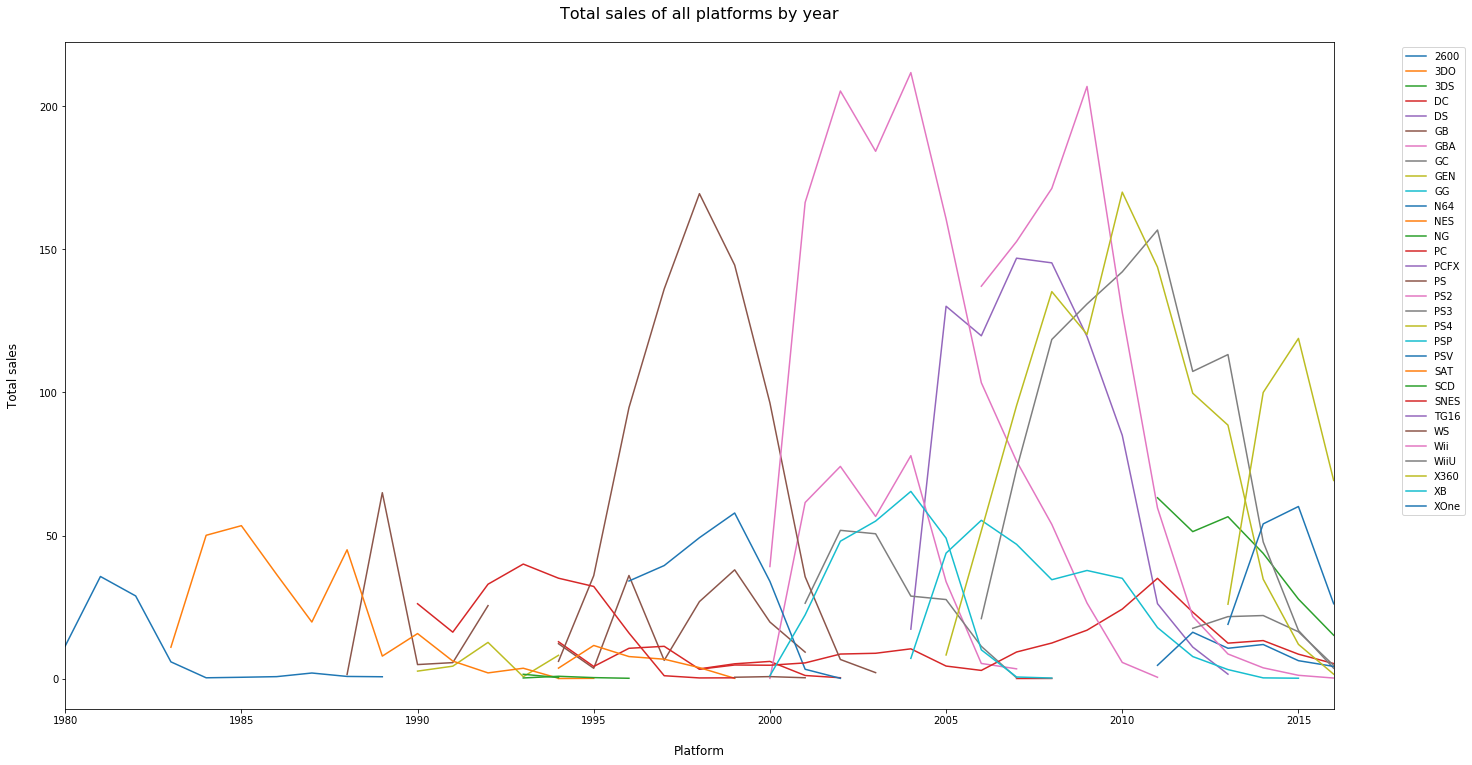

In [42]:
# build a distribution based on data for each year and all platforms

# calculate the monthly volume per user
platform_years_sales  = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platform_years_sales.plot(figsize=(20,10))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.title('Total sales of all platforms by year\n', fontsize=16)
plt.ylabel('Total sales\n', fontsize=12)
plt.xlabel('\nPlatform', fontsize=12)
plt.show()

These interesting graphs demonstrate that most platforms have a life cycle. A few last for a long time, but most appear to have an average lifespan of 4 - 5 years. There is a noticable ebb and flow to the decrease in one platform and emergence of another. We estimate about every year a new platform appears.

Next we will limit the years of data we are considering. Given that the most recent data will likely be the most useful, and we estimate the average lifespan of the platforms is 4 to 5 years, we would be confident in analyzing data from 2014, and 2015, and 2016(partial) to forecast trends for 2017. We also note that many platforms are no longer relevant for this time period. We will create a list of the platforms that are active (meaning have recorded sales) for the selected time period.

In [43]:
# eliminate years < 2014 from our dataframe
df = df.query('year_of_release > 2013')
# check for which platforms are active during select time period
print(df['platform'].value_counts()[df['platform'].value_counts()> 0])
# create list of active platforms
active_platforms = ["PS4", "PSV", "PS3", "3DS", "XOne", "PC", "X360", "WiiU", "PSP", "Wii"]

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64


Now we will investigate our filtered dataframe. We will look at which platforms are leading in sales, which are increasing and which ones are decreasing. 

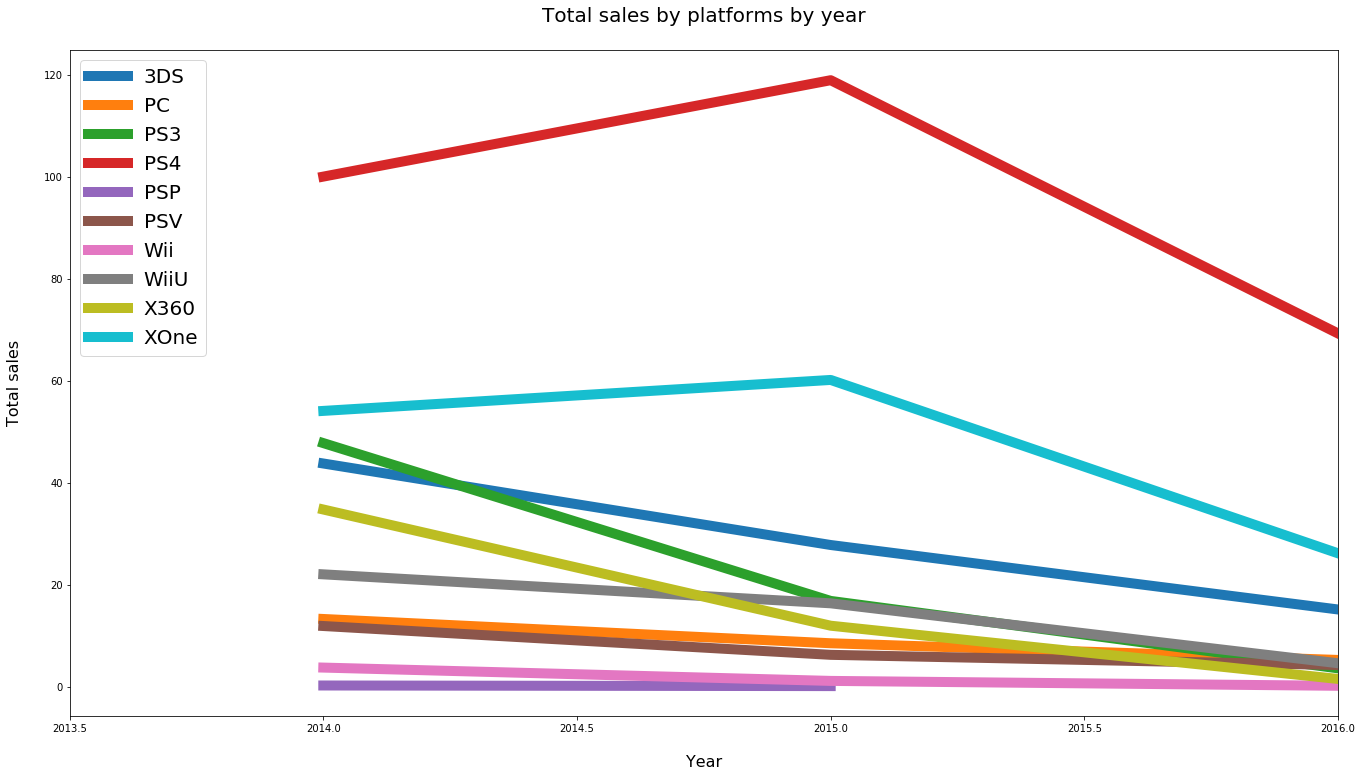

In [44]:
# calculate the total sales by platform by year
df.pivot_table(index='year_of_release', columns='platform', values='total_sales', \
               aggfunc='sum').plot(figsize=(20,10), linewidth=10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.title('Total sales by platforms by year\n', fontsize=20)
plt.ylabel('Total sales\n', fontsize=16)
plt.xlabel('\nYear', fontsize=16)
plt.xlim(2013.5, 2016)
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [45]:
df.pivot_table(index='year_of_release', columns='platform', values='total_sales', \
               aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,43.760002,13.28,47.759998,100.000000,0.24,11.90,3.75,22.030001,34.740002,54.070000
2015.0,27.779999,8.52,16.820000,118.900002,0.12,6.25,1.14,16.350000,11.960000,60.139999
2016.0,15.140000,5.25,3.600000,69.250000,NaN,4.25,0.18,4.600000,1.520000,26.150000


The platforms with the highest total sales are PS4, PS3, XOne, 3DS, and X360.
For this time period all platforms are decreasing in total_sales. This likely indicates the move towards mobile apps for game delivery. In an ideal analysis, we would have access to the mobile game information too. Now we will build a box plot for the global sales of all games, broken down by platform. 

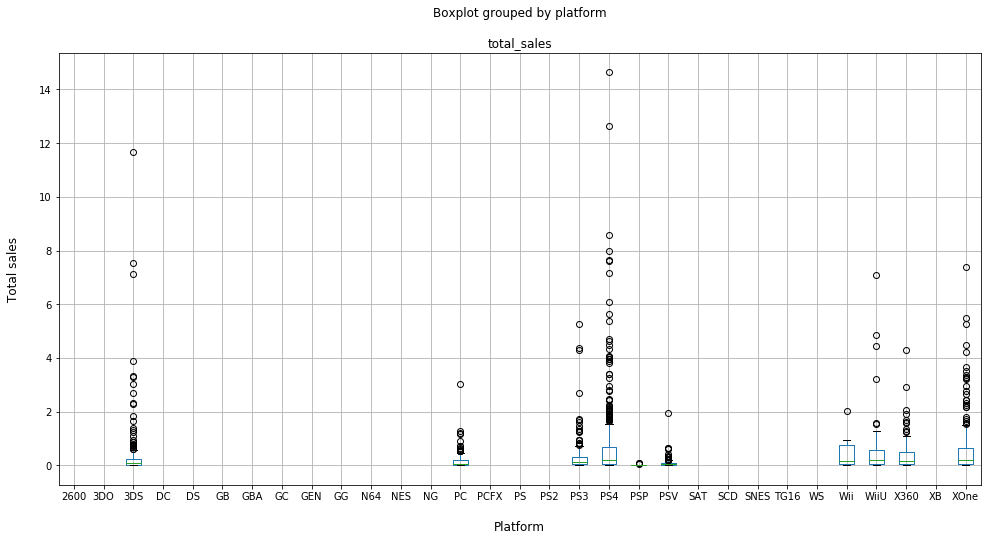

In [46]:
# create boxplots for platforms
df.boxplot(column='total_sales', by='platform', figsize=(16,8))
plt.ylabel('Total sales\n', fontsize=12)
plt.xlabel('\nPlatform', fontsize=12)
plt.show()

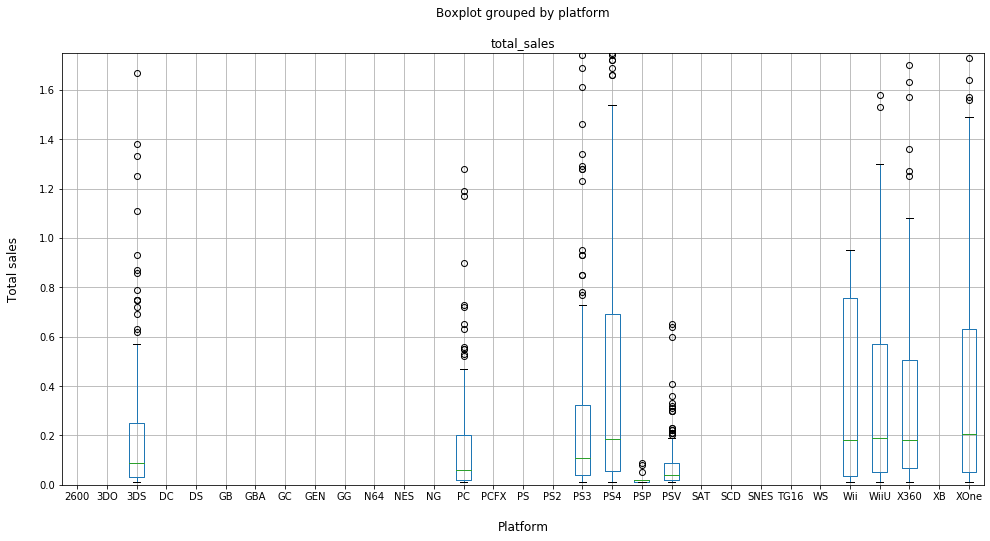

In [47]:
# create boxplots for platforms
df.boxplot(column='total_sales', by='platform', figsize=(16,8))
plt.ylabel('Total sales\n', fontsize=12)
plt.xlabel('\nPlatform', fontsize=12)
plt.ylim(0,1.75)
plt.show()

When we zero in on sales in the boxplots, we note there are many outliers. Most of the medians fall in a narrow range.  We will explore this further by finding the means, medians, and creating a line plot.

In [48]:
# stats table
df[df['platform'].isin(active_platforms)].pivot_table(index='platform', \
         values='total_sales', aggfunc=['mean', 'median'])

,mean,median
,total_sales,total_sales
platform,,
3DS,0.408868,0.090
PC,0.179139,0.060
PS3,0.311324,0.110
PS4,0.766356,0.185
PSP,0.027692,0.020
PSV,0.075932,0.040
Wii,0.460909,0.180
WiiU,0.588767,0.190


The mean total sales for this time period vary widly. XOne enjoyed the most total sales, while PSP had the least total sales. 

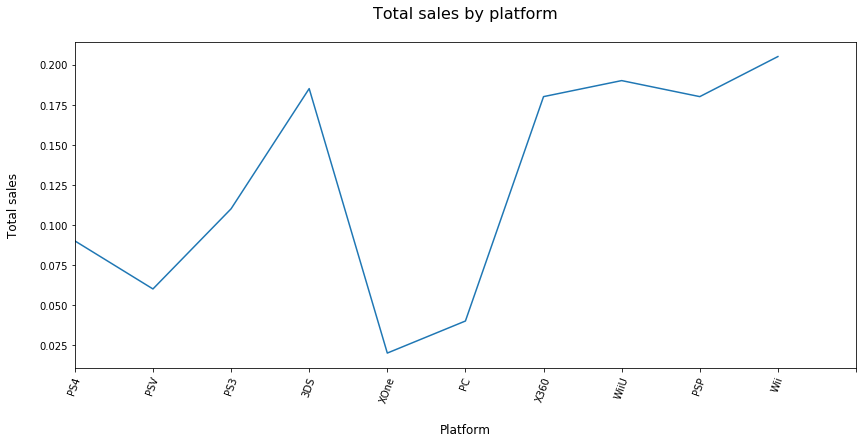

In [49]:
# line chart for total sales by platform
df[df['platform'].isin(active_platforms)].pivot_table(index='platform', \
         values='total_sales', aggfunc=['median']).plot( figsize=(14,6), legend=False)
plt.title('Total sales by platform\n', fontsize=16)
plt.ylabel('Total sales\n', fontsize=12)
plt.xlabel('\nPlatform', fontsize=12)
# Set text labels and properties.
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], \
           ["PS4", "PSV", "PS3", "3DS", "XOne", "PC", "X360", "WiiU", "PSP", "Wii"], \
           rotation=70)
plt.show()

The boxplots demonstrate there are many outliers in a majority of the platforms. There is a large difference between the medians and means and the outliers are pulling the mean upwards. There are some platforms with high total_sales for this period, like 3DS, X360, WiiU, PSP, and Wii. Some platforms had comprably low sales, like XOne, PC, and PSV. 

Now we will take a look at how user and professional reviews affect sales for PS4 by building scatter plots and calculating the correlation between reviews and sales. But first we need to check for total_sales outliers and filter the data.

In [50]:
# create a df with just PS4 & verify basic info
print('General information for PS4 platform for 2014-2016')
ps4_df = df[df.platform.isin(['PS4'])]
ps4_df.describe()

General information for PS4 platform for 2014-2016


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,genre_cat,plat_cat,total_sales
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.0,376.000000
mean,2015.236702,0.262261,0.345851,0.039947,0.118298,71.321809,7.031516,3.547872,1.0,0.766356
std,0.762336,0.583439,0.815480,0.067048,0.256506,9.863341,1.154607,2.788136,0.0,1.614969
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,1.000000,1.0,0.010000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,70.000000,6.700000,1.000000,1.0,0.057500
50%,2015.000000,0.050000,0.070000,0.015000,0.020000,70.000000,7.400000,3.000000,1.0,0.185000
75%,2016.000000,0.240000,0.280000,0.050000,0.102500,77.000000,7.600000,5.000000,1.0,0.690000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,12.000000,1.0,14.630000


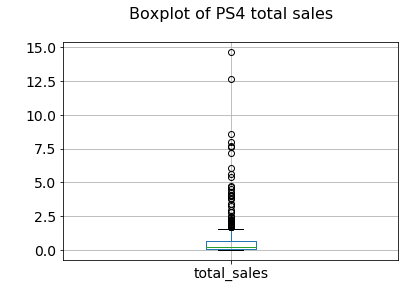

In [51]:
# create a boxplot to check for outliers in duration
ps4_df.boxplot('total_sales', fontsize=14)
plt.ylabel(' ', fontsize=14)
plt.title('Boxplot of PS4 total sales\n', fontsize=16)
plt.show()

In [52]:
# calculate and print the outlier upper limits

# calculate outlier upper limits price
Q1 = ps4_df['total_sales'].quantile(.25)
Q3 = ps4_df['total_sales'].quantile(.75)
IQR = Q3-Q1
upper_outlier_duration = Q3 + 1.5*IQR
print('Upper bound for total_sales in ps4_df:', upper_outlier_duration)

Upper bound for total_sales in ps4_df: 1.6387499952688813


In [53]:
# filter the outliers from our selected data
ps4_df.query('total_sales < 1.6387499952688813').describe()
ps4_df = ps4_df.query('total_sales < 1.6387499952688813')

In [54]:
# top grossing PS4
print('Total sales games for PS4 platform for 2014 - 2016(partial)')
ps4_df

Total sales games for PS4 platform for 2014 - 2016(partial)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,genre_cat,plat_cat,total_sales
1208,Wolfenstein: The New Order,PS4,2014.0,Shooter,0.47,0.80,0.03,0.24,79,8.1,M,5,1,1.54
1216,Ratchet & Clank (2016),PS4,2016.0,Platform,0.50,0.76,0.04,0.24,70,7.4,NaN,8,1,1.54
1275,Doom (2016),PS4,2016.0,Shooter,0.54,0.69,0.02,0.24,70,7.4,NaN,5,1,1.49
1384,Tomb Raider (2013),PS4,2014.0,Action,0.47,0.65,0.06,0.22,70,7.4,NaN,1,1,1.40
1475,The Elder Scrolls V: Skyrim,PS4,2016.0,Role-Playing,0.48,0.59,0.04,0.21,70,7.4,NaN,4,1,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69,7.5,NaN,6,1,0.01
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,70,7.4,NaN,6,1,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,4,1,0.01
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51,5.5,M,1,1,0.01


The games with the most total_sales and least total_sales on the PS4 platform for the selected time period don't reveal a strong pattern on cursory examination.  

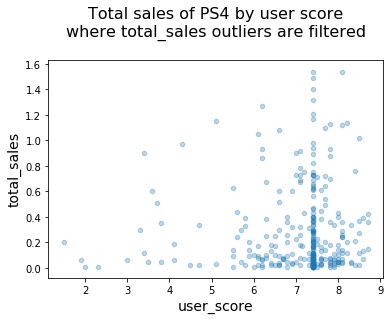

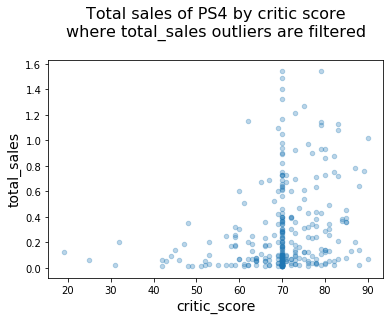

In [55]:
# create a scatterplot to look at user_score and total_sales for PS4
ps4_df.reset_index().plot(kind='scatter', x='user_score', y='total_sales', alpha=0.3)
plt.title('Total sales of PS4 by user score\nwhere total_sales outliers are filtered\n', fontsize=16)
plt.ylabel('total_sales', fontsize=14)
plt.xlabel('user_score', fontsize=14)
plt.show()
print(" ")
# create a scatterplot to look at critic_score and total_sales for PS4
ps4_df.reset_index().plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.3)
plt.title('Total sales of PS4 by critic score\nwhere total_sales outliers are filtered\n', fontsize=16)
plt.ylabel('total_sales', fontsize=14)
plt.xlabel('critic_score', fontsize=14)
plt.show()


In [56]:
# calculate correlation between sales and scores for PS4
print('Correlation for PS4 platform\nwhere total_sales outliers are filtered')
ps4_df[['total_sales', 'user_score', 'critic_score']].corr()

Correlation for PS4 platform
where total_sales outliers are filtered


,total_sales,user_score,critic_score
total_sales,1.000000,0.021676,0.241793
user_score,0.021676,1.000000,0.618820
critic_score,0.241793,0.618820,1.000000


In [57]:
# calculate correlation between sales and scores for PS4
print('Correlation for PS4 platform\nwith all total_sales values')
all_ps4 = df[df.platform.isin(['PS4'])]
all_ps4[['total_sales', 'user_score', 'critic_score']].corr()

Correlation for PS4 platform
with all total_sales values


,total_sales,user_score,critic_score
total_sales,1.000000,-0.059731,0.336614
user_score,-0.059731,1.000000,0.515790
critic_score,0.336614,0.515790,1.000000


In [58]:
# calculate correlation between sales and scores for df
print('Correlation for all selected platforms together')
print('PS4, PSV, PS3, 3DS, XOne, PC, X360, WiiU, PSP, Wii')
df[['total_sales', 'user_score', 'critic_score']].corr()

Correlation for all selected platforms together
PS4, PSV, PS3, 3DS, XOne, PC, X360, WiiU, PSP, Wii


,total_sales,user_score,critic_score
total_sales,1.000000,-0.058754,0.207223
user_score,-0.058754,1.000000,0.557282
critic_score,0.207223,0.557282,1.000000


Neither of the scatter plots demonstrate a strong correlation for total sales and the scores for the PS4 platform, but there is a realtionship between total_sales and critic_score. In the calculation of the correlation, we observe a weak relationship between user_score and total_sales and a small to moderate relationship between critic_score and total_sales. We calculated the correlations with and without filtering the total_sales outliers, but found no major difference.

Interestingly, when compared to all the selected platforms for the same period, we notice the correlation between critic_score and total_sales did increase in the PS4 only selection and the weak correlation between user_score and total_sales stayed the same. From this, we can reasonably conclude a higher critic_score will increase the likelihood of high total sales.

Now we will compare the sales of the same games on different platforms by selecting a game found on many platforms.

In [59]:
#df.name.value_counts()
print('Game                   Number of platforms')
games_platforms = df['name'].value_counts()[df['name'].value_counts()> 2]
games_platforms.head(10)

Game                   Number of platforms


FIFA 15                              8
Lego Batman 3: Beyond Gotham         8
The LEGO Movie Videogame             8
LEGO Jurassic World                  8
LEGO The Hobbit                      8
Lego Star Wars: The Force Awakens    7
Skylanders: Trap Team                7
The Amazing Spider-Man 2 (2014)      7
LEGO Marvel's Avengers               7
Skylanders: SuperChargers            7
Name: name, dtype: int64

We note several games sold on different platforms. We will examine median total_sales by platform for a few different games.

In [60]:
df.query('name == "The LEGO Movie Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,genre_cat,plat_cat,total_sales
1548,The LEGO Movie Videogame,X360,2014.0,Action,0.69,0.47,0.00,0.11,69,7.2,E10+,1,4,1.27
2236,The LEGO Movie Videogame,PS3,2014.0,Action,0.33,0.43,0.02,0.15,80,6.8,E10+,1,1,0.93
2946,The LEGO Movie Videogame,3DS,2014.0,Action,0.28,0.31,0.05,0.05,56,5.4,E10+,1,5,0.69
3011,The LEGO Movie Videogame,PS4,2014.0,Action,0.24,0.31,0.01,0.11,71,7.1,E10+,1,1,0.67
3134,The LEGO Movie Videogame,WiiU,2014.0,Action,0.33,0.23,0.03,0.05,68,7.7,E10+,1,3,0.64
3769,The LEGO Movie Videogame,XOne,2014.0,Action,0.35,0.13,0.00,0.05,69,6.9,E10+,1,4,0.53
5955,The LEGO Movie Videogame,PSV,2014.0,Action,0.04,0.19,0.00,0.07,59,5.6,E10+,1,1,0.30
12455,The LEGO Movie Videogame,PC,2014.0,Action,0.02,0.04,0.00,0.00,68,6.8,E10+,1,1,0.06


In [61]:
df.query('name == "FIFA 15"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,genre_cat,plat_cat,total_sales
143,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82,5.7,E,2,1,6.08
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,56,4.5,E,2,1,4.28
494,FIFA 15,X360,2014.0,Sports,0.79,1.92,0.00,0.21,60,4.2,E,2,4,2.92
754,FIFA 15,XOne,2014.0,Sports,0.60,1.42,0.00,0.16,82,5.4,E,2,4,2.18
3381,FIFA 15,PSV,2014.0,Sports,0.08,0.35,0.05,0.12,51,3.1,E,2,1,0.60
3611,FIFA 15,Wii,2014.0,Sports,0.15,0.37,0.00,0.04,63,4.3,E,2,3,0.56
4279,FIFA 15,3DS,2014.0,Sports,0.09,0.34,0.00,0.03,37,2.4,E,2,5,0.46
6097,FIFA 15,PC,2014.0,Sports,0.00,0.27,0.00,0.02,82,4.2,E,2,1,0.29


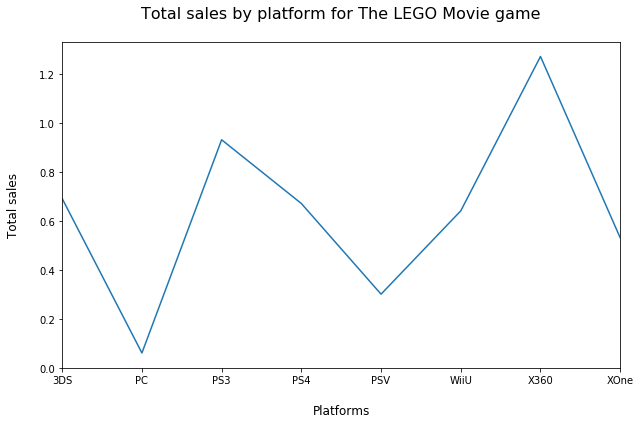

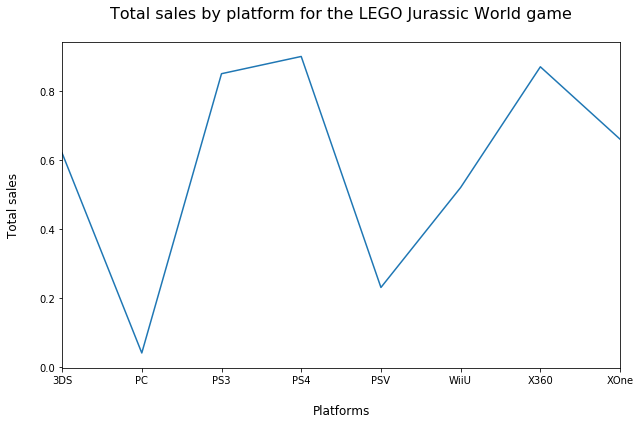

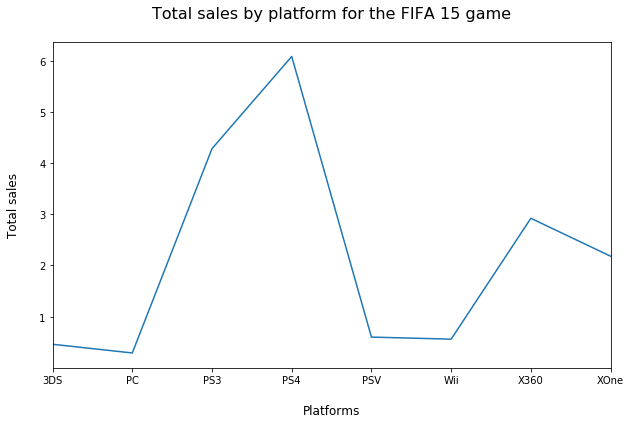

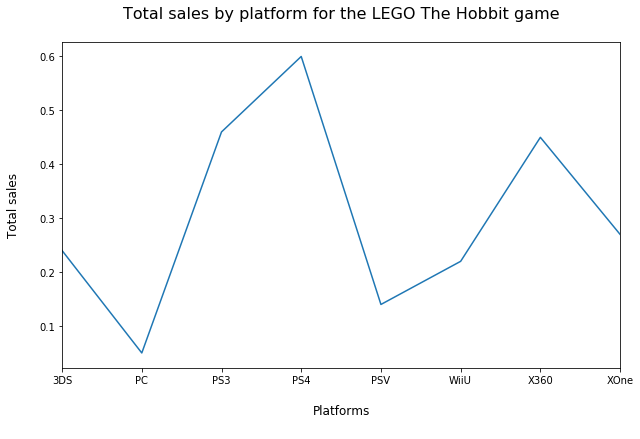

In [62]:
# line chart for total sales by platform for selected games on multiple platforms

df.query('name == "The LEGO Movie Videogame"').pivot_table(index='platform', \
         values='total_sales', aggfunc=['median']).plot( figsize=(10,6), legend=False)
plt.title('Total sales by platform for The LEGO Movie game\n', fontsize=16)
plt.ylabel('Total sales\n', fontsize=12)
plt.xlabel('\nPlatforms\n', fontsize=12)

df.query('name == "LEGO Jurassic World"').pivot_table(index='platform', \
         values='total_sales', aggfunc=['median']).plot( figsize=(10,6), legend=False)
plt.title('Total sales by platform for the LEGO Jurassic World game\n', fontsize=16)
plt.ylabel('Total sales\n', fontsize=12)
plt.xlabel('\nPlatforms\n', fontsize=12)

df.query('name == "FIFA 15"').pivot_table(index='platform', \
         values='total_sales', aggfunc=['median']).plot( figsize=(10,6), legend=False)
plt.title('Total sales by platform for the FIFA 15 game\n', fontsize=16)
plt.ylabel('Total sales\n', fontsize=12)
plt.xlabel('\nPlatforms\n', fontsize=12)

df.query('name == "LEGO The Hobbit"').pivot_table(index='platform', \
         values='total_sales', aggfunc=['median']).plot( figsize=(10,6), legend=False)
plt.title('Total sales by platform for the LEGO The Hobbit game\n', fontsize=16)
plt.ylabel('Total sales\n', fontsize=12)
plt.xlabel('\nPlatforms\n', fontsize=12)

plt.show()

We note a clear relationship between total sales and platform for these 4 games. PS4, PS3 and X360 have some of the greatest sales across games and PC and PSV demonstrate some of the lowest total sales.

Next, we will investigate games by genre.

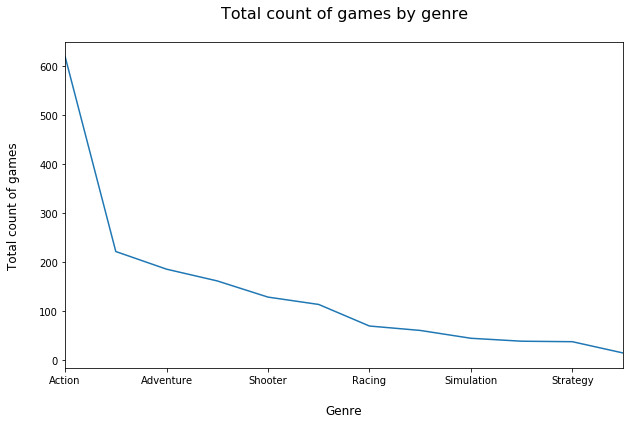

In [63]:
# create a distribution of number of calls per user_id where duration = 0
df.pivot_table(index=['genre'], values=['name'], aggfunc='count').\
    sort_values(by='name', ascending=False).plot(figsize=(10,6), legend=False)
plt.title('Total count of games by genre\n', fontsize=16)
plt.ylabel('Total count of games\n', fontsize=12)
plt.xlabel('\nGenre\n', fontsize=12)
plt.show()

Total sales by genre


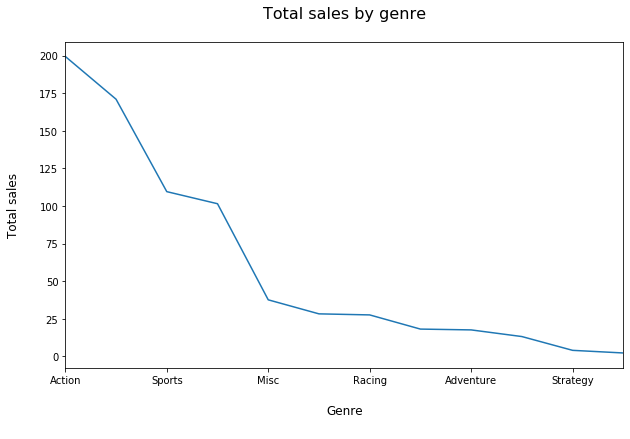

In [64]:
print('Total sales by genre')
df.pivot_table(index=['genre'], values=['total_sales'], aggfunc='sum').\
    sort_values(by='total_sales', ascending=False).plot(figsize=(10,6), legend=False)
plt.title('Total sales by genre\n', fontsize=16)
plt.ylabel('Total sales\n', fontsize=12)
plt.xlabel('\nGenre\n', fontsize=12)
plt.show()

In [65]:
print('Number of games by genre')
df.pivot_table(index=['genre'], values=['name'], aggfunc='count').\
    sort_values(by='name', ascending=False)

Number of games by genre


,name
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


In [66]:
print('Total sales (sum) by genre')
df.pivot_table(index=['genre'], values='total_sales', aggfunc='sum').\
    sort_values(by='total_sales', ascending=False)

Total sales (sum) by genre


,total_sales
genre,
Action,199.360001
Shooter,170.940002
Sports,109.479996
Role-Playing,101.440002
Misc,37.549999
Fighting,28.219999
Racing,27.520000
Platform,18.090000
Adventure,17.549999


We observe the action genre leads in both total_sales and number of games. Role playing, adventure, sports, and shooter round out the top 5 games released for this time period, in that order. Shooter, sports, role playing, and misc are 2,3,4,5 in total sales. We note overlap in popularity and number of games released, except for adventure which ranked 9th in total sales, but had the 3rd most releases.

We notice the most profitable games involve action, shooting, sports, and role playing. We can generalize that the least profitable genres are cerebral, involving puzzles and strategy. However, the genres with the least total_sales also had the fewest number of games released. We will consider the median of total sales by genre.

In [67]:
print('Total sales (median) by genre')
df.pivot_table(index=['genre'], values='total_sales', aggfunc='median').\
    sort_values(by='total_sales', ascending=False)

Total sales (median) by genre


,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Misc,0.090
Racing,0.090
Action,0.090


Again we note action, like shooter and sports, titles are the most profitable once we consider total_sales and number of games released. Strategy and puzzle are still some of the least profitable, however adventure drops to the least profitable genre when we consider median total_sales.

In [68]:
# top 5 platforms by region (na, eu, jp)
print('Total sales by platforms')
na_platform = df.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_platform.sort_values('na_sales', ascending=False).head()

Total sales by platforms


,na_sales
platform,
PS4,98.610001
XOne,81.269997
X360,28.299999
3DS,22.639999
PS3,22.049999


In [69]:
eu_platform = df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_platform.sort_values('eu_sales', ascending=False).head()

,eu_sales
platform,
PS4,130.039993
XOne,46.250000
PS3,25.539999
PC,17.969999
3DS,16.120001


In [70]:
jp_platform = df.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_platform.sort_values('jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,44.240002
PS4,15.020000
PSV,14.540000
PS3,11.220000
WiiU,7.310000


We observe PS4 enjoys the most total sales in both the north american and european markets. In north american, XOne's total sales are close to PS4 while in europe XOne is also the second most profitable platform, but the sales are close to a third of PS4. 3DS leads sales in the japanese market, followed distantly by PS4. 3DS is still in the top 5 for both the european and north american markets, but the total_sales is a low percentage of the the total market.

Now we will examine the top 5 genres across regions.

In [71]:
# top 5 genres by region (na, eu, jp)
print('Top 5 genre by count by regions')
na_platform = df.pivot_table(index='genre', values='na_sales', aggfunc='sum')
na_platform.sort_values('na_sales', ascending=False).head()

Top 5 genre by count by regions


,na_sales
genre,
Shooter,79.019997
Action,72.529999
Sports,46.130001
Role-Playing,33.470001
Misc,15.050000


In [72]:
eu_platform = df.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
eu_platform.sort_values('eu_sales', ascending=False).head()

,eu_sales
genre,
Action,74.680000
Shooter,65.519997
Sports,45.730000
Role-Playing,28.170000
Racing,14.130000


In [73]:
jp_platform = df.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
jp_platform.sort_values('jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


It is notable that the total sales for the top 5 genres in the japanese market is less than half the total sales for the top 5 genres in both the north american and european markets. The north american and european markets share many similarities, 4/5 are the same, although in a different order. The japanese market also spends money on role playing, action, and shooter games, but the genre with the 3rd highest revenue is fighting.

Now we will investigate the ESRB rating and regions. Since there are so many missing values in ESRB column, we will use a filtered df to look for trends.

In [74]:
# create dataframe filtering out esrb null values
esrb_df = df.query('rating.notnull()')
# ratings by region (na, eu, jp)
print('Ratings by count by regions')
na_platform = esrb_df.pivot_table(index='rating', values='na_sales', aggfunc='sum')
print(na_platform.sort_values('na_sales', ascending=False))
print(' ')
eu_platform = esrb_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
print(eu_platform.sort_values('eu_sales', ascending=False))
print(' ')
jp_platform = esrb_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
print(jp_platform.sort_values('jp_sales', ascending=False))

Ratings by count by regions
         na_sales
rating           
M       96.419998
E       50.740002
T       38.950001
E10+    33.230000
AO       0.000000
EC       0.000000
K-A      0.000000
RP       0.000000
 
         eu_sales
rating           
M       93.440002
E       58.060001
T       34.070000
E10+    26.160000
AO       0.000000
EC       0.000000
K-A      0.000000
RP       0.000000
 
        jp_sales
rating          
T          14.78
E           8.94
M           8.01
E10+        4.46
AO          0.00
EC          0.00
K-A         0.00
RP          0.00


We observe that only 4 ratings, T (teen), E (everyone), M (mature), and E10+ (everyone 10 years and older), are recorded for the sales markets. Again, the european and north american markets are very similar: M leads, then E, T, and E10+. In the japanese market, the T rating has the majority of the sales, followed by E, M, and finally E10+.

Now we will prepare to test the hypotheses.

—Average user ratings of the Xbox One and PC platforms are the same.
—Average user ratings for the Action and Sports genres are different.

We will first calculate the mean, variance, standard deviation, and count of our 4 groups.

In [75]:
# create statistic table for  mean, variance, standard deviation, count

xone_df = df.query('platform == "XOne"')
xone_df_avg = xone_df.user_score.mean()
xone_df_var = np.var(xone_df.user_score)
xone_df_std = np.std(xone_df.user_score)
xone_df_ct = len(xone_df.user_score)

pc_df = df.query('platform == "PC"')
pc_df_avg = pc_df.user_score.mean()
pc_df_var = np.var(pc_df.user_score)
pc_df_std = np.std(pc_df.user_score)
pc_df_ct = len(pc_df.user_score)

action_df = df.query('genre == "Action"')
action_df_avg = action_df.user_score.mean()
action_df_var = np.var(action_df.user_score)
action_df_std = np.std(action_df.user_score)
action_df_ct = len(action_df.user_score)

sports_df = df.query('genre == "Sports"')
sports_df_avg = sports_df.user_score.mean()
sports_df_var = np.var(sports_df.user_score)
sports_df_std = np.std(sports_df.user_score)
sports_df_ct = len(sports_df.user_score)

# put values in table
stats_plans = pd.DataFrame({'stats': ['mean', 'variance', 'st_deviation', 'count'],
                         'XOne Platform': [xone_df_avg, xone_df_var, xone_df_std, xone_df_ct],
                         'PC Platform': [pc_df_avg, pc_df_var, pc_df_std, pc_df_ct],
                         'Action Genre': [action_df_avg, action_df_var, action_df_std, action_df_ct],
                         'Sports Genre': [sports_df_avg, sports_df_var, sports_df_std,sports_df_ct],
                         'stats': ['mean', 'variance', 'st_deviation', 'count'] })
stats_plans.set_index('stats', inplace=True)
stats_plans

,XOne Platform,PC Platform,Action Genre,Sports Genre
stats,,,,
mean,6.809649,6.509934,7.087723,5.675156
variance,1.491135,2.513080,1.016101,3.467457
st_deviation,1.221120,1.585270,1.008018,1.862111
count,228.000000,151.000000,619.000000,161.000000


We note that our first pair, comparing XOne and PC platforms have close means with fairly close standard deviations and variances that are not too far apart. The means for the 2nd pair, action vs sports, are noticeably different and their standard deviations and variances have a greater difference than the 1st pair. This information supports the hypotheses we've been tasked to test, that average user rating for Xbox One and PC platforms are the same and the average user ratings for the Action and Sports genres are different.


We will now test our hypotheses, using the null hypothesis method. These are formulated based on the premis that the two groups are equal. For the second test, average user rating is different for Action and Sports, we will need to reverse our findings when explaining the results.


Compare the user ratings from the Xbox One and PC platforms given the contention that the average user ratings of the Xbox One and PC platforms are the same. If the null hypothesis is rejected, this is likely false.

Null hypothesis: The average user_score for the XOne platform - the average user_score for the PC platform = 0.

Alternative hypothesis: The average user_score for the XOne platform - the average user_score for the PC platform != 0.


Compare the user ratings from the Action and Sports genre given the contention that the average user ratings of the Action and Sports genre are the same. If the null hypothesis is rejected, this is false, they are very unlikely to be the same and therefore the average user rating has a high chance of being different.

Null hypothesis: The average user_score for the Action genre - the average user_score for the Sports genre = 0.

Alternative hypothesis: The average user_score for the Action genre - the average user_score for the Sports genre != 0.


We will use the standard critical alpha value of 0.05 and equal_var=False because each pair has an unequal variance. 

In [76]:
# hypothesis: Average user_score for platforms XOne and PC platforms are equal

alpha = 0.05

results = st.ttest_ind(xone_df.user_score, pc_df.user_score, equal_var = False)

print('Average user_score for platforms XOne and PC platforms are equal')
print('using the standard 0.05 critical value.\n')

print('p-value:', results.pvalue)

# compare the p-value you get with the significance level
if np.all(results.pvalue < alpha):
    print("\nWe reject the null hypothesis")
else:
    print("\nWe can't reject the null hypothesis")

results = st.ttest_ind

Average user_score for platforms XOne and PC platforms are equal
using the standard 0.05 critical value.

p-value: 0.05074981301642838

We can't reject the null hypothesis


The data can only contradict the hypothesis or, conversely, show that the results are extremely unlikely. In this test, the standard p-value is borderline, just over the alpha of 0.05, but much higher than the strict alpha of 0.01. We can't reject the null hyposthesis, so the average user_scores for the platforms XOne and PC are have a greater chance of being equal than not. We cannot reject the hypothesis we were given to test:

Average user ratings of the Xbox One and PC platforms are the same.

In [77]:
# hypothesis: Average user_score for Action and Sports genre are equal

alpha = 0.05

results = st.ttest_ind(action_df.user_score, sports_df.user_score, equal_var = False)

print('Average user_score for Action and Sports genre are equal')
print('using the standard 0.05 critical value.\n')

print('p-value:', results.pvalue)

# compare the p-value you get with the significance level
if np.all(results.pvalue < alpha):
    print("\nWe reject the null hypothesis")
else:
    print("\nWe can't reject the null hypothesis")

results = st.ttest_ind

Average user_score for Action and Sports genre are equal
using the standard 0.05 critical value.

p-value: 5.496647293972345e-17

We reject the null hypothesis


This is a robust finding with a very low p-value and we will reject the null hypothesis. It is very likely that the average values for user_score are different between the Action and Sports genre. This supports the hypothesis we were given: 

Average user ratings for the Action and Sports genres are different.

**[Return to table of contents](#table_of_contents)**

<a class="anchor" id="conclusion"></a>
*   **4. Overall conclusion**
    1. **In the [Data preprocessing](#data_preprocessing) stage**:
        - We changed the column names to lowercase
        - We observed many missing values representing values that may never have been recorded, collected, or created (in the case of reviews and ratings). Many of the missing values were noted in games released prior to 2011, so those records might have been lost or simply never collected.
        - We deleted the 2 NaN records in name/genre (they are the same records) since they:
            - they will not help our analysis
            - are in rows where only the platform, year_of_release, and sales data is available
        - We left the 269 rows with NaT values in the year_of_release column because:
            - those rows may have valuable information and potentially could help our analysis
            - there is no time reasonable way to replace the NaT with correct year values
        - We filled in the missing rows of the user_score column with the influence of critic_score first and then median because:
            - we observed a moderate to strong correlation between critic_score and user_score
            - we observed the mean skewed downward slightly, so we used the median to replace values
        - We filled in the missing rows of the critic_score column with the influence of user_score first and then median because:
            - we observed a moderate to strong correlation between critic_score and user_score
            - we observed the mean skewed downward slightly, so we used the median to replace values
        - We left the 6764 rows with NaT values in the rating column because:
            - those rows may have valuable information and potentially could help our analysis
            - there is no time reasonable way to replace the NaT with correct year values
        - We changed the data types because:
            - year_of_relase should be in datetime, user_score should be float
            - reduce overall memory usage             
    2. **In the [Calculations](#calculations) stage**:
        - We calculated the total sales (the sum of sales in all regions) for each game and put this value in the total_sales column     
    3. **In the [Exploratory data analysis](#exploratory_data_analysis) stage**:        
        - We discovered wide variability in games released each year, with a general downward trend for the last 5 years. This data doesn't include mobile apps, so it is plausible that the market is moving towards mobile apps. 
        - We observed wide variability in sales between platforms.
        - We selected the top 5 platforms, PS2, X360, PS3, Wii, and DS.
        - We will build a distribution for the top 5 grossing platforms for year and total_sales.
        - We observed platforms have a lifespan of about 4-5 years and a new one emerges about once a year.
        - We filtered our data to reflect the most recent years (2014, 2015, and 2016 (partial) to forecast trends for 2017.
        - We identified the platforms with the highest total sales for this time period.
        - We noticed many outliers in boxplots of platforms with total sales.
        - We observed mean total sales for this time period vary widly. XOne enjoyed the most total sales, while PSP had the least total sales.
        - We noticed through scatter plots are correlation tables that user_score has a weak influence on sales for PS4, but critic_score actually has a small to medium influence.
        - We note a clear relationship between total sales and platform for these 4 games. PS4, PS3 and X360 have some of the greatest sales across games and PC and PSV demonstrate some of the lowest total sales.
        - We observe the action genre leads in both total_sales and number of games. Role playing, adventure, sports, and shooter round out the top 5 games
        - We notice the most profitable games involve action, shooting, sports, and role playing. We can generalize that the least profitable genres are cerebral, involving puzzles and strategy.
        - We observe PS4 enjoys the most total sales in both the north american and european markets. In north american, XOne's total sales are close to PS4 while in europe XOne is also the second most profitable platform, but the sales are close to a third of PS4. 3DS leads sales in the japanese market, followed distantly by PS4.
        - We note the total sales for the top 5 genres in the japanese market is less than half the total sales for the top 5 genres in both the north american and european markets.
        - We observe that only 4 ratings, T (teen), E (everyone), M (mature), and E10+ (everyone 10 years and older), are recorded for the sales markets. Again, the european and north american markets are very similar: M leads, then E, T, and E10+. In the japanese market, the T rating has the majority of the sales, followed by E, M, and finally E10+.
        - We test the hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
            The data can only contradict the hypothesis or, conversely, show that the results are extremely unlikely. In this test, the standard p-value is borderline, just over the alpha of 0.05, but much higher than the strict alpha of 0.01. We can't reject the null hyposthesis, so the average user_scores for the platforms XOne and PC are have a greater chance of being equal than not. We **cannot reject** the hypothesis we were given to test: Average user ratings of the Xbox One and PC platforms are the same.        
        - We test the hypothesis: Average user ratings for the Action and Sports genres are different.
            This is a robust finding with a very low p-value and we will reject the null hypothesis. It is very likely that the average values for user_score are different between the Action and Sports genre. This supports the hypothesis we were given: Average user ratings for the Action and Sports genres are different.
        - We discovered wide variability in games released each year, with a general downward trend for the last 5 years. This data doesn't include mobile apps, so it is plausible that the market is moving towards mobile apps. 
        - We observed wide variability in sales between platforms.
        - We selected the top 5 platforms, PS2, X360, PS3, Wii, and DS.
        - We will build a distribution for the top 5 grossing platforms for year and total_sales.
        - We observed platforms have a lifespan of about 4-5 years and a new one emerges about once a year.
        - We filtered our data to reflect the most recent years (2014, 2015, and 2016 (partial) to forecast trends for 2017.
        - We identified the platforms with the highest total sales for this time period.
        - We noticed many outliers in boxplots of platforms with total sales.
        - We observed mean total sales for this time period vary widly. XOne enjoyed the most total sales, while PSP had the least total sales.
        - We noticed through scatter plots are correlation tables that user_score has a weak influence on sales for PS4, but critic_score actually has a small to medium influence.
        - We note a clear relationship between total sales and platform for these 4 games. PS4, PS3 and X360 have some of the greatest sales across games and PC and PSV demonstrate some of the lowest total sales.
        - We observe the action genre leads in both total_sales and number of games. Role playing, adventure, sports, and shooter round out the top 5 games
        - We notice the most profitable games involve action, shooting, sports, and role playing. We can generalize that the least profitable genres are cerebral, involving puzzles and strategy.
        - We observe PS4 enjoys the most total sales in both the north american and european markets. In north american, XOne's total sales are close to PS4 while in europe XOne is also the second most profitable platform, but the sales are close to a third of PS4. 3DS leads sales in the japanese market, followed distantly by PS4.
        - We note the total sales for the top 5 genres in the japanese market is less than half the total sales for the top 5 genres in both the north american and european markets.
        - We observe that only 4 ratings, T (teen), E (everyone), M (mature), and E10+ (everyone 10 years and older), are recorded for the sales markets. Again, the european and north american markets are very similar: M leads, then E, T, and E10+. In the japanese market, the T rating has the majority of the sales, followed by E, M, and finally E10+.
        - We test the hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
            The data can only contradict the hypothesis or, conversely, show that the results are extremely unlikely. In this test, the standard p-value is borderline, just over the alpha of 0.05, but much higher than the strict alpha of 0.01. We can't reject the null hyposthesis, so the average user_scores for the platforms XOne and PC are have a greater chance of being equal than not. We **cannot reject** the hypothesis we were given to test: Average user ratings of the Xbox One and PC platforms are the same.        
        - We test the hypothesis: Average user ratings for the Action and Sports genres are different.
            This is a robust finding with a very low p-value and we will reject the null hypothesis. It is very likely that the average values for user_score are different between the Action and Sports genre. This **supports** the hypothesis we were given: Average user ratings for the Action and Sports genres are different.
            

        

**[Return to table of contents](#table_of_contents)**

**References**

[replacing a string with NaN](https://stackoverflow.com/questions/53668421/replace-a-string-value-with-nan-in-pandas-data-frame-python)

[Graphing legends](https://www.delftstack.com/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/)

[For datetime64[ns] types, NaT represents missing values](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

[Value counts and filtering](https://blog.softhints.com/pandas-how-to-filter-results-of-value_counts/)